In [1]:
import data
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import multivariate_normal
from scipy.special import logsumexp

In [2]:
train_data, train_labels, test_data, test_labels = data.load_all_data_from_zip('a4digits.zip', 'data')
accuracy = lambda predicted_labels, actual_labels: sum(predicted_labels == actual_labels) / len(actual_labels)

## Bernoulli Naive Bayes

In [10]:
def binarize_data(pixel_values):
    '''
    Binarize the data by thresholding around 0.5
    '''
    return np.where(pixel_values > 0.5, 1.0, 0.0)

def compute_parameters(train_data, train_labels):
    '''
    Compute the eta MAP estimate/MLE with augmented data

    You should return a numpy array of shape (10, 64)
    where the ith row corresponds to the ith digit class.
    '''
    eta = [(train_data[train_labels==i].sum(axis=0) + 1) / (len(train_data[train_labels==i]) + 1) for i in range(10)]
    return np.array(eta)

def plot_images(class_images):
    '''
    Plot each of the images corresponding to each class side by side in grayscale
    '''
    all_concat = np.concatenate([class_k.reshape((8, 8)) for class_k in class_images], 1)
    plt.imshow(all_concat, cmap='gray')
    plt.show()

def generate_new_data(eta):
    '''
    Sample a new data point from your generative distribution p(x|y,theta) for
    each value of y in the range 0...10

    Plot these values
    '''
    generated_data = np.random.binomial(1, eta)
    plot_images(generated_data)

def generative_likelihood(bin_digits, eta):
    '''
    Compute the generative log-likelihood:
        log p(x|y, eta)

    Should return an n x 10 numpy array 
    '''
    return np.array([[np.sum(np.log(np.where(datum == 1, k_eta, 1 - k_eta))) for k_eta in eta] 
                     for datum in bin_digits])
    

def conditional_likelihood(bin_digits, eta):
    '''
    Compute the conditional likelihood:

        log p(y|x, eta)

    This should be a numpy array of shape (n, 10)
    Where n is the number of datapoints and 10 corresponds to each digit class
    '''
    generative_likelihoods = generative_likelihood(bin_digits, eta)
    posterior = generative_likelihoods - logsumexp(generative_likelihoods, axis=1).reshape((len(bin_digits), 1))        
    return posterior

def avg_conditional_likelihood(bin_digits, labels, eta):
    '''
    Compute the average conditional likelihood over the true class labels

        AVG( log p(y_i|x_i, eta) )

    i.e. the average log likelihood that the model assigns to the correct class label
    '''
    cond_likelihood = conditional_likelihood(bin_digits, eta)
    true_class_likelihoods = []
    for i, likelihoods in enumerate(cond_likelihood):
        true_class_likelihoods.append(likelihoods[int(labels[i])])
    return np.array(true_class_likelihoods).mean()

def classify_data(bin_digits, eta):
    '''
    Classify new points by taking the most likely posterior class
    '''
    cond_likelihood = conditional_likelihood(bin_digits, eta)
    # Compute and return the most likely class
    return np.array([np.argmax(cl) for cl in cond_likelihood])

In [11]:
train_data, test_data = binarize_data(train_data), binarize_data(test_data)

In [12]:
# Fitting the model
eta = compute_parameters(train_data, train_labels)

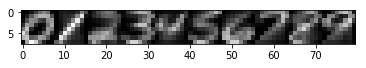

In [13]:
# visualizing the parameters
plot_images(eta)

### Generating and plotting a sample from the model

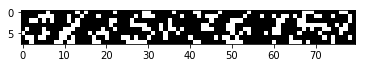

In [22]:
generate_new_data(eta)

### Average conditional likelihoods for the training and test data

In [23]:
avg_conditional_likelihood(train_data, train_labels, eta)

-0.9444270335010504

In [24]:
avg_conditional_likelihood(test_data, test_labels, eta)

-0.9879978316003171

### Accuracy score for the training and test data

In [25]:
predicted_test_labels = classify_data(test_data, eta)
accuracy(predicted_test_labels, test_labels)

0.76425

In [26]:
predicted_train_labels = classify_data(train_data, eta)
accuracy(predicted_train_labels, train_labels)

0.774